## **Импорт библиотек**

In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

## **Загрузка базы MNIST**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **Нормирование и преобразование x_train и y_train**

In [ ]:
#смена разрешения изображений
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#нормализация входных картинок
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#Преобразуем в формат one code encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

## **Создание и обучение нейронной сети**

### Первая нейронная сеть будет с 10-ю нейронами в первом слое, активационной функцией linear, batch_size = 1

In [ ]:
model1 = Sequential()
model1.add(Dense(10, input_dim = 784, activation = 'linear'))
model1.add(Dense(400, activation = 'linear'))
model1.add(Dense(10, activation = 'linear'))

In [ ]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy')
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 400)               4400      
                                                                 
 dense_8 (Dense)             (None, 10)                4010      
                                                                 
Total params: 16,260
Trainable params: 16,260
Non-trainable params: 0
_________________________________________________________________
None


При таких загрузках в скрытых слоях нейронной сети находятся 16,260 элементов

In [ ]:
model1.fit(x_train, y_train, batch_size = 1, epochs = 15, verbose = 1)

Epoch 1/15
60000/60000 [==============================] - 104s 2ms/step - loss: 8.1308
Epoch 2/15
60000/60000 [==============================] - 102s 2ms/step - loss: 8.0002
Epoch 3/15
60000/60000 [==============================] - 100s 2ms/step - loss: 8.0002
Epoch 4/15
60000/60000 [==============================] - 100s 2ms/step - loss: 8.0002
Epoch 5/15
60000/60000 [==============================] - 100s 2ms/step - loss: 8.0002
Epoch 6/15
60000/60000 [==============================] - 101s 2ms/step - loss: 8.0002
Epoch 7/15
60000/60000 [==============================] - 102s 2ms/step - loss: 8.0002
Epoch 8/15
60000/60000 [==============================] - 101s 2ms/step - loss: 8.0002
Epoch 9/15
60000/60000 [==============================] - 99s 2ms/step - loss: 8.0002
Epoch 10/15
60000/60000 [==============================] - 100s 2ms/step - loss: 8.0002
Epoch 11/15
60000/60000 [==============================] - 101s 2ms/step - loss: 8.0002
Epoch 12/15
60000/60000 [=================

Обучение происходить очень долго из-за параметра batch_size = 1. А потери почти не менялись на протяжении обучения

### Вторая нейронная сеть будет с 100 нейронами в первом слое, активационной функцией linear, batch_size = 10

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim = 784, activation = 'linear'))
model2.add(Dense(400, activation = 'linear'))
model2.add(Dense(10, activation = 'linear'))

In [ ]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy')
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 400)               4400      
                                                                 
 dense_8 (Dense)             (None, 10)                4010      
                                                                 
Total params: 16,260
Trainable params: 16,260
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 400)               40400     
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
Total params: 122,910
Trainable params: 122,910
Non-trainable params: 0
_________________________________________________________________
None


В данном случае внутри нейронной сети находится 122,910 элементов

In [ ]:
model2.fit(x_train, y_train, batch_size = 10, epochs = 15, verbose = 1)

Epoch 1/15
6000/6000 [==============================] - 16s 3ms/step - loss: 9.0400
Epoch 2/15
6000/6000 [==============================] - 16s 3ms/step - loss: 8.1401
Epoch 3/15
6000/6000 [==============================] - 15s 3ms/step - loss: 8.1401
Epoch 4/15
6000/6000 [==============================] - 15s 3ms/step - loss: 8.1401
Epoch 5/15
6000/6000 [==============================] - 15s 3ms/step - loss: 8.1401
Epoch 6/15
6000/6000 [==============================] - 15s 2ms/step - loss: 8.1401
Epoch 7/15
6000/6000 [==============================] - 16s 3ms/step - loss: 8.1401
Epoch 8/15
6000/6000 [==============================] - 16s 3ms/step - loss: 8.1401
Epoch 9/15
6000/6000 [==============================] - 16s 3ms/step - loss: 8.1401
Epoch 10/15
6000/6000 [==============================] - 15s 3ms/step - loss: 8.1402
Epoch 11/15
6000/6000 [==============================] - 15s 3ms/step - loss: 8.1401
Epoch 12/15
6000/6000 [==============================] - 16s 3ms/step - lo

Модель обучалась около 3 минут, что является хорошим показателем, при этом проказатели потерь были стабильными на протяжении всего обучения

### Третья нейронная сеть будет с 5000-ю нейронами в первом слое, активационной функцией linear, batch_size = 100

In [ ]:
model3 = Sequential()
model3.add(Dense(5000, input_dim = 784, activation = 'linear'))
model3.add(Dense(400, activation = 'linear'))
model3.add(Dense(10, activation = 'linear'))

In [ ]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy')
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5000)              3925000   
                                                                 
 dense_13 (Dense)            (None, 400)               2000400   
                                                                 
 dense_14 (Dense)            (None, 10)                4010      
                                                                 
Total params: 5,929,410
Trainable params: 5,929,410
Non-trainable params: 0
_________________________________________________________________
None


Модель имеет почти 6 млн элементов в сети

In [ ]:
model3.fit(x_train, y_train, batch_size = 100, epochs = 15, verbose = 1)

Epoch 1/15
600/600 [==============================] - 71s 117ms/step - loss: 9.9310
Epoch 2/15
600/600 [==============================] - 67s 112ms/step - loss: 10.7706
Epoch 3/15
600/600 [==============================] - 68s 114ms/step - loss: 10.7706
Epoch 4/15
600/600 [==============================] - 66s 109ms/step - loss: 10.7707
Epoch 5/15
600/600 [==============================] - 68s 113ms/step - loss: 10.7706
Epoch 6/15
600/600 [==============================] - 66s 109ms/step - loss: 10.7706
Epoch 7/15
600/600 [==============================] - 66s 110ms/step - loss: 10.7707
Epoch 8/15
600/600 [==============================] - 68s 113ms/step - loss: 10.7706
Epoch 9/15
600/600 [==============================] - 68s 113ms/step - loss: 10.7706
Epoch 10/15
600/600 [==============================] - 66s 110ms/step - loss: 10.7707
Epoch 11/15
600/600 [==============================] - 66s 110ms/step - loss: 10.7706
Epoch 12/15
600/600 [==============================] - 66s 109ms

На обучение ушло больш времени, чем во втором случае, но меньше, чем в первом. Показатели потерь также оставались стабильными

### Четвёртая нейронная сеть будет с 800 нейронами в первом слое, активационной функцией linear, batch_size = 60000

In [ ]:
model4 = Sequential()
model4.add(Dense(800, input_dim = 784, activation = 'linear'))
model4.add(Dense(400, activation = 'linear'))
model4.add(Dense(10, activation = 'linear'))

In [ ]:
model4.compile(optimizer='Adam', loss='categorical_crossentropy')
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 400)               40400     
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
Total params: 122,910
Trainable params: 122,910
Non-trainable params: 0
_________________________________________________________________
None


В четвёртом случае в модели 122,910 элементов

In [ ]:
model4.fit(x_train, y_train, batch_size = 60000, epochs = 15, verbose = 1)

Epoch 1/15
1/1 [==============================] - 6s 6s/step - loss: 7.0082
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 7.2721
Epoch 3/15
1/1 [==============================] - 5s 5s/step - loss: 5.6754
Epoch 4/15
1/1 [==============================] - 4s 4s/step - loss: 4.6257
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 4.0973
Epoch 6/15
1/1 [==============================] - 5s 5s/step - loss: 3.4446
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 3.4058
Epoch 8/15
1/1 [==============================] - 4s 4s/step - loss: 3.3880
Epoch 9/15
1/1 [==============================] - 5s 5s/step - loss: 3.3771
Epoch 10/15
1/1 [==============================] - 4s 4s/step - loss: 3.3684
Epoch 11/15
1/1 [==============================] - 5s 5s/step - loss: 3.3601
Epoch 12/15
1/1 [==============================] - 5s 5s/step - loss: 3.3525
Epoch 13/15
1/1 [==============================] - 4s 4s/step - loss: 3.3448
Epoch 14

На обучение ушло около 1 минуты, при этром показатели потерь постоянно варьировались

## **Распознавание рукописных цифр**

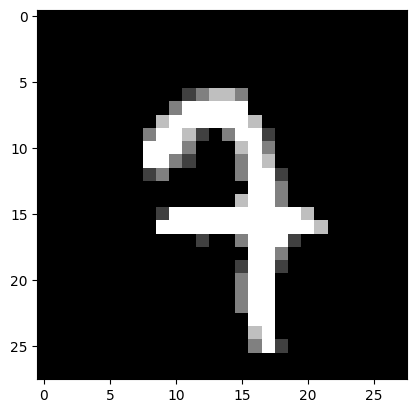

In [ ]:
n = 3333
plt.imshow(Image.fromarray(x_test_org[n]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n]
x = np.expand_dims(x, axis=0)
prediction1 = model1.predict(x)
prediction2 = model2.predict(x)
prediction3 = model3.predict(x)
prediction4 = model4.predict(x)

1/1 [==============================] - 0s 58ms/step


In [ ]:
print(prediction1)

[[-24.828156  24.99936  -18.900574 -22.988464 -21.665947  29.196173
  -32.717834  28.347975  26.438374  26.536543]]


In [ ]:
print(prediction2)

[[  8.772027    8.636787  -10.638316  -10.2747965 -10.778184   11.9975605
    9.619475   13.161242  -12.561005  -12.304497 ]]


In [ ]:
print(prediction3)

[[  59.764095  101.43595    63.17077    62.699013 -100.45455    53.049084
   -94.98935   -92.13082  -118.28456    84.87693 ]]


In [ ]:
print(prediction4)

[[ -1.7030523  -8.876433    6.7013593 -18.677004   -4.3406186  -4.403299
   -4.6005177  -4.2491193  -2.9074306  -6.214603 ]]


In [ ]:
pred1 = np.argmax(prediction1)
pred2 = np.argmax(prediction2)
pred3 = np.argmax(prediction3)
pred4 = np.argmax(prediction4)

In [ ]:
print(pred1)

5


In [ ]:
print(pred2)

7


In [ ]:
print(pred3)

1


In [ ]:
print(pred4)

2


In [ ]:
print(y_test_org[n])

7


По результатам тестовой выборки только одна нейцронная сеть дала правильный ответ. Все ключевые факторы повлияли на скорость и точность обучения, что в конечном итоге выдавало ошибки при распознавании числа